/Users/alperkaraca/anaconda3/envs/TF/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


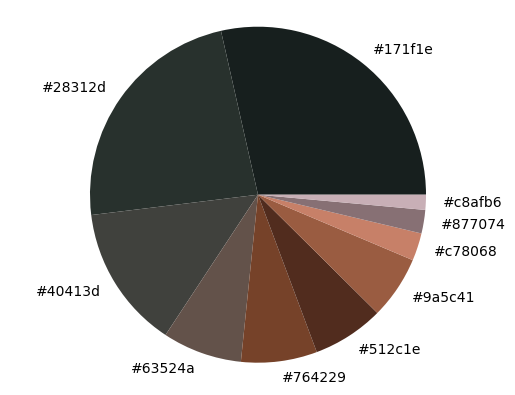

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def find_colors(image_path, num_colors):
    # Resmi yükle
    image = cv2.imread(image_path)
    
    # Resmi BGR renk uzayından RGB'ye dönüştür
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resmi yeniden boyutlandır
    image = cv2.resize(image, (200, 200))
    
    # Resmi düzleştir (2D diziden 1D diziyi elde etmek için)
    image = image.reshape((-1, 3))
    
    # KMeans algoritması ile renkleri kümele
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(image)
    
    # KMeans modelinden renkleri ve etiketlerini al
    colors = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    # Renkleri RGB formatından hex formatına dönüştür
    hex_colors = [RGB_to_hex(color) for color in colors]
    
    return hex_colors, labels

def RGB_to_hex(color):
    r, g, b = color
    return '#{:02x}{:02x}{:02x}'.format(int(r), int(g), int(b))

def plot_pie_chart(colors, labels):
    # Etiketlerin sayısını hesapla
    counts = np.bincount(labels)
    
    # Renkleri ve etiketleri birleştir
    color_labels = list(zip(colors, counts))
    
    # En çok tekrar eden renkleri al
    top_colors = sorted(color_labels, key=lambda x: x[1], reverse=True)[:10]
    
    # Renkleri ve sayılarını ayrı listelere ayır
    colors, counts = zip(*top_colors)
    
    # Pie chartı oluştur
    plt.pie(counts, labels=colors, colors=colors)
    plt.axis('equal')
    plt.show()

# Resim üzerindeki renkleri bulma
image_path = 'needles.jpg'  # Resim dosya yolu
num_colors = 10  # Bulunacak renk sayısı

colors, labels = find_colors(image_path, num_colors)

# Pie chart üzerinde renkleri gösterme
plot_pie_chart(colors, labels)
